In [35]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import time
from glob import glob
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [36]:
data_path = "../data/raw/"

In [37]:
annotation_df = pd.read_csv(data_path+'annotation.csv')
annotation_df.head()

,image,height,weight,BMI
0,f_001,1.55,61.0,25.390219
1,f_002,1.76,85.0,27.440599
2,f_003,1.78,56.0,17.674536
3,f_004,1.63,63.0,23.711845
4,f_005,1.76,54.0,17.432851


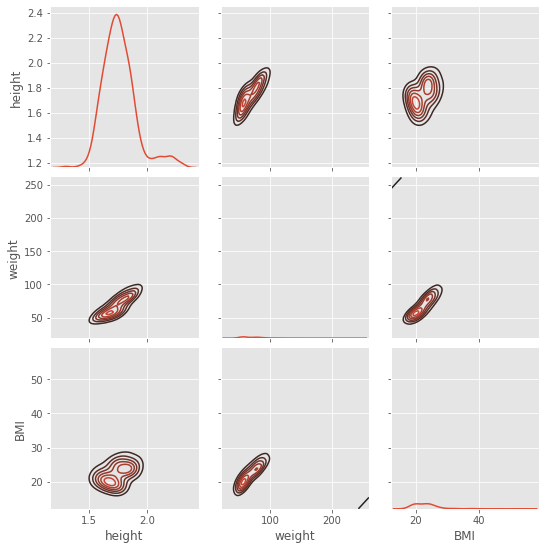

In [81]:
sample = annotation_df[['height','weight','BMI']]
g = sns.PairGrid(sample);
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

Text(0, 0.5, 'Frequency')

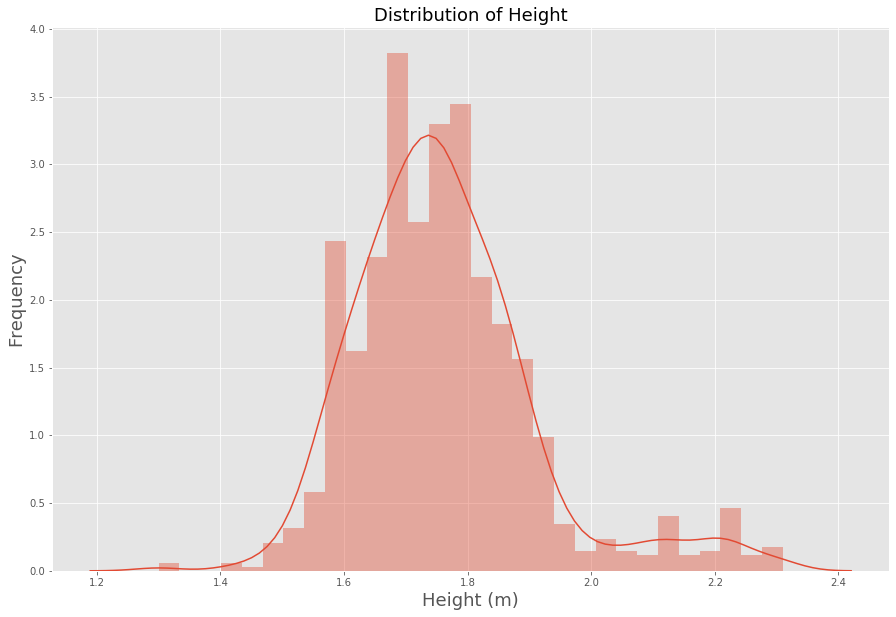

In [77]:
# histogram of the height
plt.figure(figsize=(15, 10))
sns.distplot(sample.height)
plt.title('Distribution of Height', size=18)
plt.xlabel('Height (m)', size=18)
plt.ylabel('Frequency', size=18)

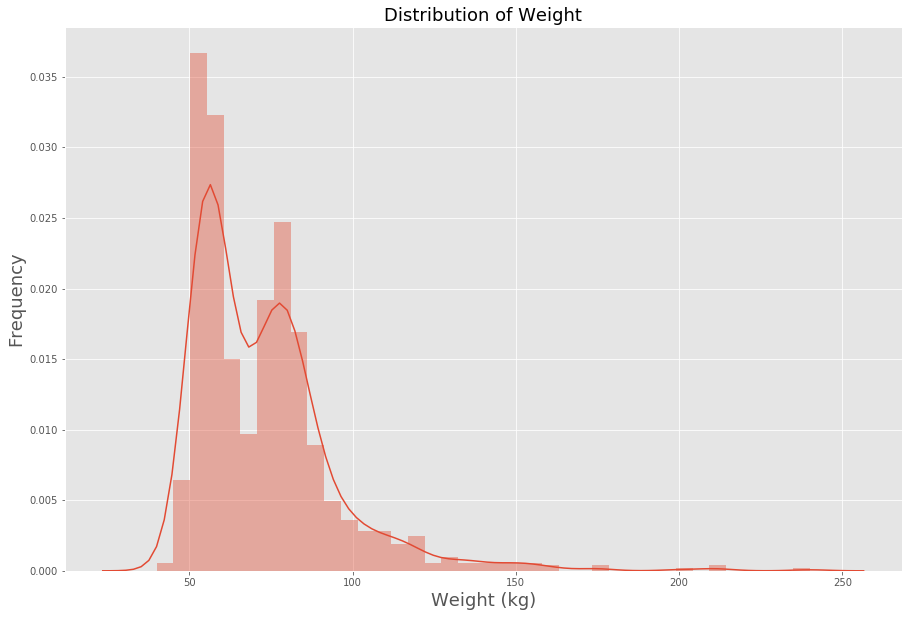

In [79]:
# histogram of the weight
plt.figure(figsize=(15, 10))
sns.distplot(sample.weight)
plt.title('Distribution of Weight', size=18)
plt.xlabel('Weight (kg)', size=18)
plt.ylabel('Frequency', size=18);

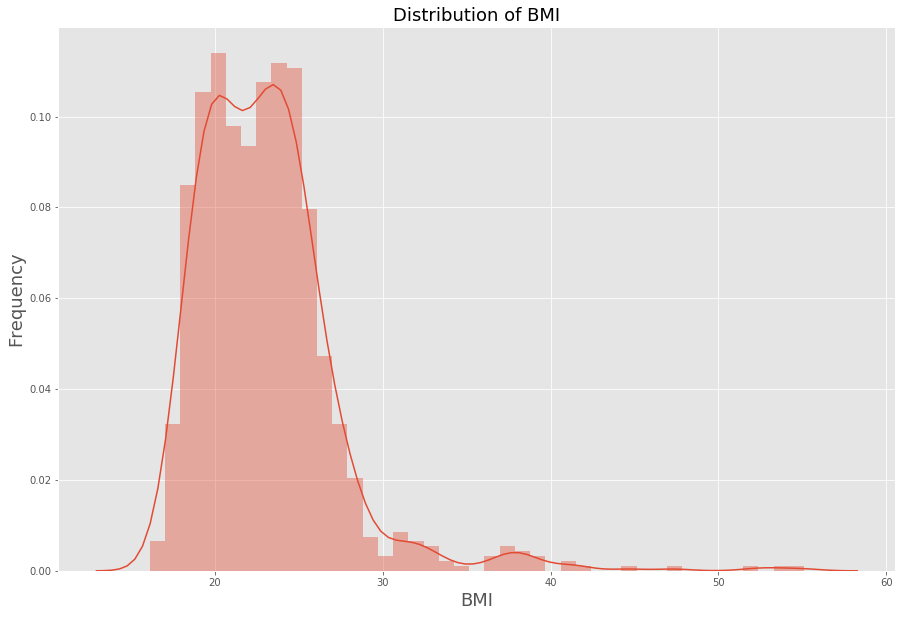

In [82]:
# histogram of the BMI
plt.figure(figsize=(15, 10))
sns.distplot(sample.BMI)
plt.title('Distribution of BMI', size=18)
plt.xlabel('BMI', size=18)
plt.ylabel('Frequency', size=18);

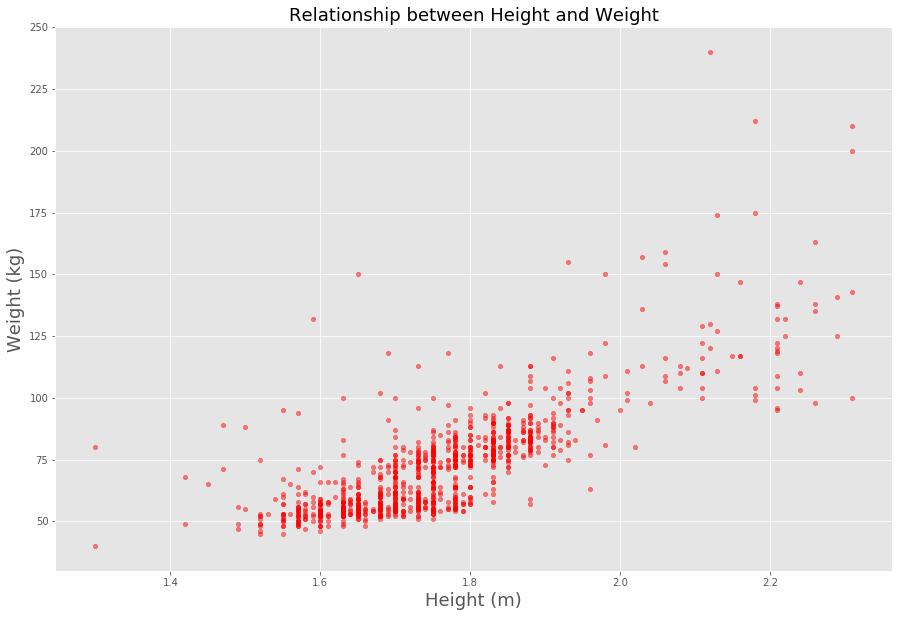

In [98]:
annotation_df.plot(kind='scatter', x='height', y='weight', color='red', alpha=0.5, figsize=(15, 10))
plt.title('Relationship between Height and Weight', size=18)
plt.xlabel('Height (m)', size=18)
plt.ylabel('Weight (kg)', size=18);

<Figure size 1080x1080 with 0 Axes>

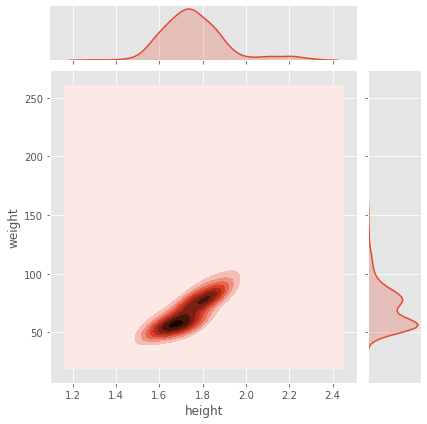

In [90]:
plt.figure(figsize=(15, 15))
sns.jointplot(x="height", y="weight", data=sample, kind="kde");

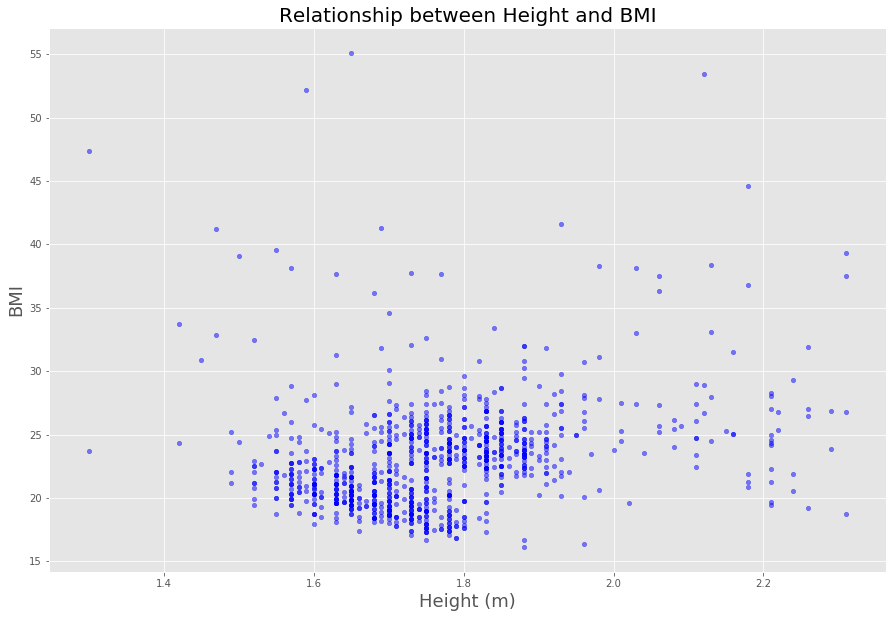

In [85]:
annotation_df.plot(kind='scatter', x='height', y='BMI', color='blue', alpha=0.5, figsize=(15, 10))
plt.title('Relationship between Height and BMI', size=20)
plt.xlabel('Height (m)', size=18)
plt.ylabel('BMI', size=18);

<Figure size 1080x1080 with 0 Axes>

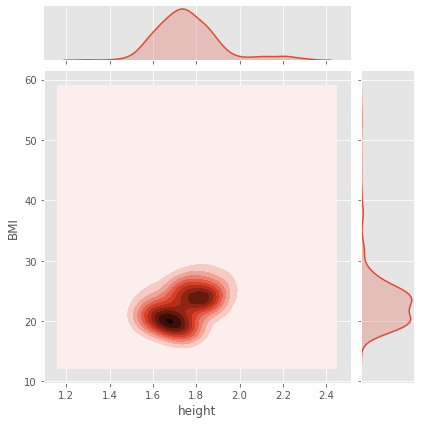

In [91]:
plt.figure(figsize=(15, 15))
sns.jointplot(x="height", y="BMI", data=sample, kind="kde");

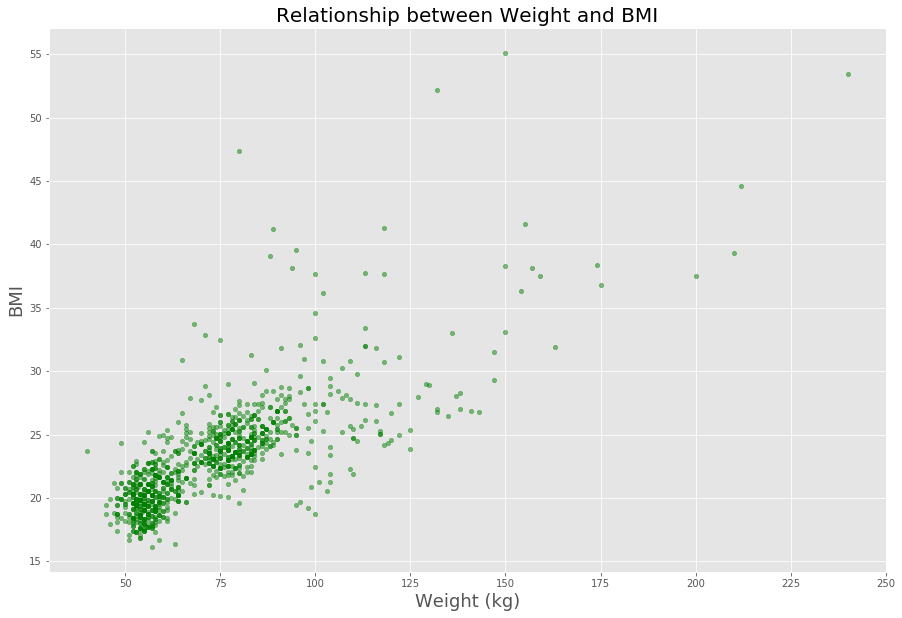

In [93]:
annotation_df.plot(kind='scatter', x='weight', y='BMI', color='green', alpha=0.5, figsize=(15, 10))
plt.title('Relationship between Weight and BMI', size=20)
plt.xlabel('Weight (kg)', size=18)
plt.ylabel('BMI', size=18);

<Figure size 1080x1080 with 0 Axes>

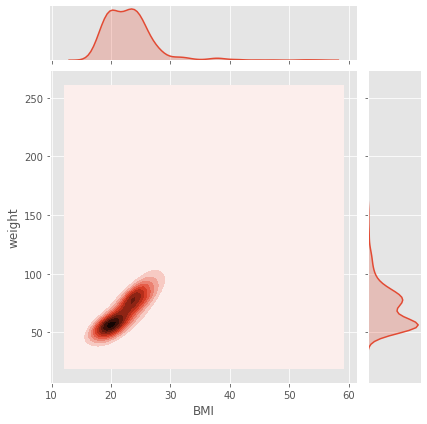

In [92]:
plt.figure(figsize=(15, 15))
sns.jointplot(x="BMI", y="weight", data=sample, kind="kde");

In [24]:
all_files = glob(data_path+"images/*")
all_jpgs = sorted([img for img in all_files if ".jpg" in img or ".jpeg" in img or "JPG" in img])
print("Total {} photos ".format(len(all_jpgs)))

Total 1026 photos 


In [25]:
id_path = [image for image in all_jpgs ]
image_df = pd.DataFrame(id_path, columns=['path'])

In [26]:
full_df = image_df.merge(annotation_df, left_index=True, right_index=True)
full_df.head()

,path,image,height,weight,BMI
0,../data/raw/images/f_001.jpg,f_001,1.55,61.0,25.390219
1,../data/raw/images/f_002.jpg,f_002,1.76,85.0,27.440599
2,../data/raw/images/f_003.jpg,f_003,1.78,56.0,17.674536
3,../data/raw/images/f_004.jpg,f_004,1.63,63.0,23.711845
4,../data/raw/images/f_005.jpg,f_005,1.76,54.0,17.432851


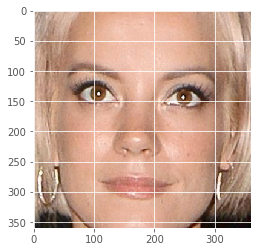

In [96]:
# Preview encoding function
from random import randint
idx = randint(0, 1027)
original_image = cv2.imread(full_df.iloc[idx].path)
reverse_color = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
plt.imshow(reverse_color);

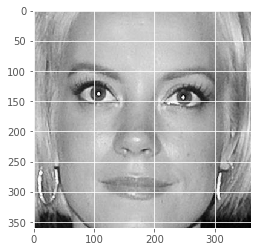

In [97]:
grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('../src/haarcascade_frontalface_alt.xml')
detected_faces = face_cascade.detectMultiScale(grayscale_image)
plt.imshow(grayscale_image, cmap='gray');

In [ ]:
impor